header-logo.svg
### *Your AI buddy for your workout*

## Importing the dependencies

The required packages are imported. If not present they will be downloaded.


Libraries/packages for math/machine learning

In [33]:
import numpy as np
import pandas as pd
import difflib  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Libraries/packages for Input validation

In [34]:
!pip install pydantic
from pydantic import BaseModel

Libraries/packages for building an API

In [35]:
!pip install fastapi

Libraries/packages for serving the API (server)

In [36]:
!pip install colabcode
from colabcode import ColabCode

## Data Collection and Pre-Processing

In [37]:
# Loading the data from the csv file to apandas dataframe
# REMEMBER: FILE MUST BE PRESENT IN THE FILE SYSTEM
exercise_data = pd.read_csv('convertcsv.csv')
exercise_dataWithIdx = exercise_data
exercise_dataWithIdx['index_col'] = exercise_dataWithIdx.index

In [38]:
# Printing the first 5 rows of the dataframe
exercise_data.head()

,id,uuid,name,exercise_base,status,description,creation_date,category,equipment/0,language,...,muscles/0,muscles/1,muscles_secondary /0,license_ author,exercise_base,equipment/1,u uid,muscles /0,nam e,index_col
0,346.0,c789d643-150a-4ac7-97ef-84643c6419bf,3 Handed Kettlebell Swing,10.0,3.0,<p>Two Handed Russian Style Kettlebell Swing</p>,2016-08 -03,11.0,11.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,175.0,99882bdd-43d7-4c3b-82ed-9c187d0455b7,Abductor Machine,13.0,NaN,<ul>\r\n<li>Put in an upright position with yo...,2014-07-19,10.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,224.0,e57d0a17-b1b8-427d-991e-97c530c7db6a,Adductor machine,14.0,3.0,<p>Thigh inside! </p>,2015-02-26,10.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,229.0,881bff63-6798-4ffc-a818-b2a1ccfec0f7,Arnold Press,21.0,3.0,"<p>Hold two dumbbells, palms in in front of ch...",2015-03-09,14.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,228.0,54ca25b3-61d9-4f72-bfdb-492b83484ff5,Arnold Shoulder Press,21.0,3.0,<p >Very common shoulder exercise.</p>\r\n<p> ...,NaN,14.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [39]:
# Number of rows and columns in the data frame
exercise_data.shape

(397, 80)

In [40]:
# Selecting the relevant features for recommendation
selected_features = ['name','description', 'category']
print(selected_features)

['name', 'description', 'category']


In [41]:
# Replacing the null valuess with null string
for feature in selected_features:
  exercise_data[feature] = exercise_data[feature].fillna('')

In [42]:
# Combining all the selected features
combined_features = exercise_data['name']+' '+exercise_data['description']+' '+str(exercise_data['category'])
print(combined_features)

0      3 Handed Kettlebell Swing <p>Two Handed Russia...
1      Abductor Machine <ul>\r\n<li>Put in an upright...
2      Adductor machine <p>Thigh inside! </p> 0      ...
3      Arnold Press <p>Hold two dumbbells, palms in i...
4      Arnold Shoulder Press <p >Very common shoulder...
                             ...                        
392    Upright Row, on Multi Press <p>The movements a...
393    Upright Row, SZ-bar <p>Stand straight, your fe...
394    Upright Row w/ Dumbbells <p>Feet apart at shou...
395    V-Bar Pulldown <p>Pulldowns using close grip v...
396    Bending Lateral Raise <p>Sit on the edge of a ...
Length: 397, dtype: object


## Text vectorization/tokenization

Tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Rajaraman, A., & Ullman, J. (2011). Data Mining. In Mining of Massive Datasets (pp. 1-17). Cambridge: Cambridge University Press. doi:10.1017/CBO9781139058452.002


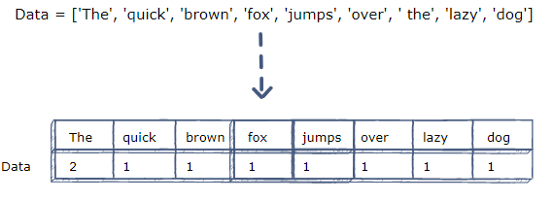


Source: https://medium.com/@sid321axn/fake-news-detection-using-nlp-and-machine-learning-in-python-wisdom-ml-6f548b0691a7

In [43]:
# Converting the text data to feature vectors
# SkLearn uses Term Frequency-Inverse Document Frequency (tf-idf)
vectorizer = TfidfVectorizer()

In [44]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [45]:
print(feature_vectors)

  (0, 1415)	0.04563298349309569
  (0, 571)	0.04563298349309569
  (0, 20)	0.04563298349309569
  (0, 1185)	0.04563298349309569
  (0, 367)	0.04563298349309569
  (0, 1355)	0.04563298349309569
  (0, 19)	0.04563298349309569
  (0, 2)	0.04563298349309569
  (0, 18)	0.04563298349309569
  (0, 17)	0.04563298349309569
  (0, 16)	0.04563298349309569
  (0, 15)	0.04563298349309569
  (0, 3)	0.27379790095857415
  (0, 0)	0.09126596698619138
  (0, 1)	0.04563298349309569
  (0, 2037)	0.2555519013348944
  (0, 1791)	0.26867969259834606
  (0, 2179)	0.16841377973013824
  (0, 2060)	0.3642168952872535
  (0, 1094)	0.5111038026697888
  (0, 898)	0.5743645503673445
  (1, 1283)	0.09723178713700202
  (1, 1434)	0.028144806064395057
  (1, 1028)	0.08025818754617835
  (1, 2226)	0.09096733655323731
  :	:
  (396, 1203)	0.09315065042487375
  (396, 1401)	0.08206006302736608
  (396, 145)	0.063827418808545
  (396, 1425)	0.05825160450414573
  (396, 2125)	0.18514892144914638
  (396, 2090)	0.20376915600132778
  (396, 100)	0.08675478

# Cosine Similarity
Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.


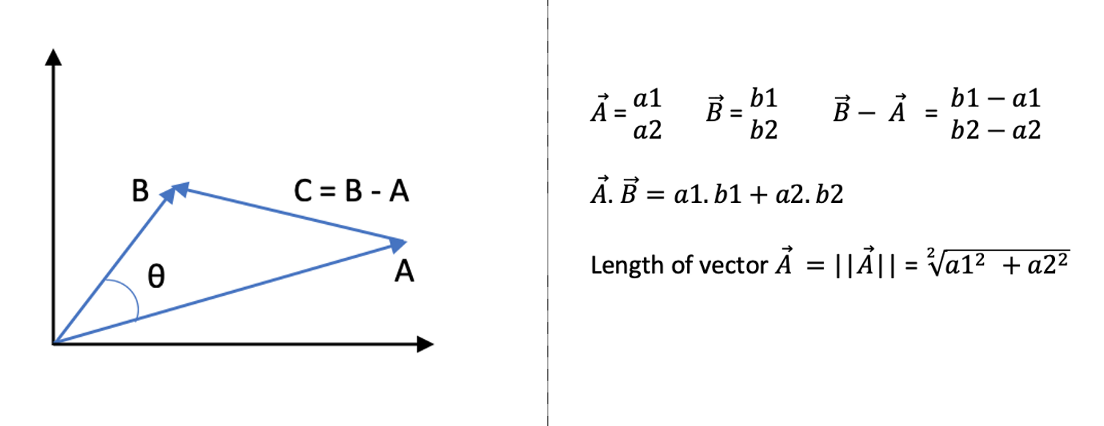
Source: https://miro.medium.com/max/1104/1*mv617aAq7NHIXFXFa2xH4A.png

In [46]:
# Getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [47]:
print(similarity)

[[1.         0.03736666 0.19649302 ... 0.17062991 0.17668471 0.06455384]
 [0.03736666 1.         0.0790438  ... 0.13237986 0.05982044 0.11811264]
 [0.19649302 0.0790438  1.         ... 0.30378667 0.31456653 0.11493059]
 ...
 [0.17062991 0.13237986 0.30378667 ... 1.         0.27316217 0.15305031]
 [0.17668471 0.05982044 0.31456653 ... 0.27316217 1.         0.10334453]
 [0.06455384 0.11811264 0.11493059 ... 0.15305031 0.10334453 1.        ]]


In [48]:
print(similarity.shape)

(397, 397)


### Getting the exercise name from the user

In [49]:
# Getting the exercise name from the user
exercise_name = input(' Enter your favourite exercise name : ')

 Enter your favourite exercise name : Abductor


In [50]:
# Creating a list with all the exercise names given in the dataset
list_of_all_titles = exercise_data['name'].tolist()

In [51]:
# Finding the close match for the exercise name given by the user
find_close_match = difflib.get_close_matches(exercise_name, list_of_all_titles)
print(find_close_match)

['Abductor Machine']


In [52]:
close_match = find_close_match[0]
print(close_match)

Abductor Machine


In [53]:
# Finding the index of the exercise with title
index_of_the_exercise = int(exercise_data[exercise_data.name == close_match]['index_col'].values[0])
print(index_of_the_exercise)

1


In [54]:
# Getting a list of similar exercises
similarity_score = list(enumerate(similarity[index_of_the_exercise]))
print(similarity_score)

[(0, 0.03736665599920726), (1, 1.0000000000000002), (2, 0.07904379611348282), (3, 0.13969362096470964), (4, 0.044004217591098356), (5, 0.3885525307597735), (6, 0.07647430237737933), (7, 0.08423942047764772), (8, 0.06297098310908562), (9, 0.12093767164018797), (10, 0.09154873174848936), (11, 0.18872676924398685), (12, 0.15556145864052315), (13, 0.15125408831106266), (14, 0.4094510524483673), (15, 0.12141232505237358), (16, 0.08482342158623857), (17, 0.1435592926178656), (18, 0.18489661679915645), (19, 0.04773464791409035), (20, 0.18803955244187134), (21, 0.08402767329978461), (22, 0.10093943204684526), (23, 0.09541267431373901), (24, 0.13207468042749174), (25, 0.14811812310052322), (26, 0.17339454069366847), (27, 0.1246880927400994), (28, 0.14018550553535014), (29, 0.1780477752097228), (30, 0.09943362040769478), (31, 0.09598605803603757), (32, 0.1484410293888601), (33, 0.13281368106031402), (34, 0.15258728760752932), (35, 0.14690768329196746), (36, 0.3905512224128835), (37, 0.1442987861

In [55]:
# Sorting the exercises based on their similarity score
sorted_similar_exercises = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_exercises)

[(1, 1.0000000000000002), (207, 0.728207690914048), (204, 0.7124922825211963), (315, 0.7085600947039605), (367, 0.675577644334511), (319, 0.6487093118727016), (177, 0.6456185592002085), (358, 0.630244699309224), (308, 0.6196962468801626), (350, 0.5970497232258342), (321, 0.5907035144762433), (195, 0.5891161767011923), (57, 0.5863703755232463), (229, 0.5613928525007099), (71, 0.5474323790844924), (176, 0.5406829953324831), (40, 0.5366776550805822), (124, 0.5177232792094153), (361, 0.48928315725936516), (267, 0.4884084079140504), (369, 0.429905744296098), (14, 0.4094510524483673), (36, 0.3905512224128835), (5, 0.3885525307597735), (299, 0.21137610452033595), (392, 0.20431112498735635), (393, 0.19820894409383702), (11, 0.18872676924398685), (20, 0.18803955244187134), (240, 0.1879846490715332), (92, 0.18762773600499216), (18, 0.18489661679915645), (219, 0.1838205512163328), (196, 0.18300441774890472), (317, 0.17875493854276406), (29, 0.1780477752097228), (155, 0.1776172272436581), (378, 0.

In [56]:
# Print the name of similar exercises based on the index
import math
print('Exercises suggested for you : \n')

i = 1

for exercise in sorted_similar_exercises:
  index = exercise[0]
  title_from_index = exercise_data[exercise_data.index==index]['name'].values[0]
  if (i<11 and not isinstance(title_from_index, float) and title_from_index.strip() != ''):
    print(i, '.',title_from_index)
    i+=1

Exercises suggested for you : 

1 . Abductor Machine
2 .  Lat pulldown with arms tucked into pulley
3 . Lat Pulldown
4 . Side raises
5 . Thruster
6 . Side upper body bends on the machine
7 . Incline Dumbbell Row
8 . Stiff-legged Deadlifts
9 . KH Shoulder Press
10 . Squats


# Deploying the model

## Create a validation class

Using pydantic, we can validate the input. This will be usefull later, when we want to get input from the user in the API.

In this case, there is only one input. We force the input to be of the class String. We also show an example of a good input.

In [57]:
class Workout(BaseModel):
    exercise: str 
    class Config:
        schema_extra = {
            "example": {
                "exercise": "Abductor Machine", 
            }
        }

## Create a function that handles the user input and feeds it to the Model

This function takes the user input that will be fed from the API, then it queries the ML model to find good recommendations. Those recommendations are then returned.

In [82]:
def modelPredict(exerciseName : str):
  # Get only the titles of the exercises
  list_of_all_titles = exercise_data['name'].tolist()

  # Find closest match to the user input
  find_close_match = difflib.get_close_matches(exerciseName, list_of_all_titles)
  close_match = find_close_match[0]
  index_of_the_exercise = int(exercise_data[exercise_data.name == close_match]['index_col'].values[0])

  # Get recommended exercises
  similarity_score = list(enumerate(similarity[index_of_the_exercise]))
  sorted_similar_exercises = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

  # Return best matches
  res = []
  i = 1
  for exercise in sorted_similar_exercises:
    index = exercise[0]
    title_from_index = exercise_data[exercise_data.index==index]['name'].values[0]
    if (i<6 and not isinstance(title_from_index, float) and title_from_index.strip() != ''):
      print(i, '.',title_from_index)
      res.append(title_from_index)
      i+=1
  
  return res

In [83]:
modelPredict("Abductor Machine")

1 . Abductor Machine
2 .  Lat pulldown with arms tucked into pulley
3 . Lat Pulldown
4 . Side raises
5 . Thruster


['Abductor Machine',
 ' Lat pulldown with arms tucked into pulley',
 'Lat Pulldown',
 'Side raises',
 'Thruster']

## Create API for deploying the model

A simple API with fastAPI is created. This allows other users to access the model with just an HTTP call.

In [100]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predictOne')
def get_prediction(data: Workout):
    received = data.dict()
    name = received['exercise']
    pred_id = modelPredict(name)[0]
    return {'prediction': pred_id}

@app.post('/predict')
def get_predictionNames(data: Workout):
    received = data.dict()
    name = received['exercise']
    pred_exercises = modelPredict(name)
    return {'prediction': pred_exercises}

@app.post('/predictId')
def get_predictionIds(data: Workout):
    received = data.dict()
    name = received['exercise']
    pred_exercises = modelPredict(name)
    pred_ids = []
    for predName in pred_exercises:
      id = int(exercise_data[exercise_data.name == predName]['id'].values[0])
      if not isinstance(id, float):
        pred_ids.append(id)

    return {'prediction': pred_ids}

In [103]:
test = Workout(exercise="Chest")
get_predictionIds(test)

1 . Chest Press
2 . Shoulder Press, on Machine
3 . Shoulder machine
4 . Triceps Machine
5 . Burpees


{'prediction': [200, 153, 54, 140, 355]}

## Run a server

In order to get the API running we require to get an IP Address, to make it available for everyone we use an NgrokTunnel.
 https://ngrok.com/

In [84]:
  server = ColabCode(port=10000, code=False)

In [ ]:
  server.run_app(app=app)

Public URL: NgrokTunnel: "https://46a6-35-245-16-71.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [385]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     107.190.47.16:0 - "GET / HTTP/1.1" 200 OK
1 . Chest Press
2 . Shoulder Press, on Machine
3 . Shoulder machine
4 . Triceps Machine
5 . Burpees
INFO:     107.190.47.16:0 - "POST /predictOne HTTP/1.1" 200 OK
1 . Chest Press
2 . Shoulder Press, on Machine
3 . Shoulder machine
4 . Triceps Machine
5 . Burpees
INFO:     107.190.47.16:0 - "POST /predict HTTP/1.1" 200 OK
1 . Chest Press
2 . Shoulder Press, on Machine
3 . Shoulder machine
4 . Triceps Machine
5 . Burpees
INFO:     107.190.47.16:0 - "POST /predict HTTP/1.1" 200 OK
1 . Chest Press
2 . Shoulder Press, on Machine
3 . Shoulder machine
4 . Triceps Machine
5 . Burpees
INFO:     107.190.47.16:0 - "POST /predictId HTTP/1.1" 200 OK
